In [7]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from IPython.display import display, HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from real_estate import mortgage
from real_estate.metadata import Acquisition, Rehab, PreReFi_Rent, Refinance
from real_estate.aggregate import YearlySummary

In [9]:
# purchase
purchase_price = 290e3
downpayment = 20e3
rehab_cost = 25e3
after_repair_value = 450e3
value_appreciation = 0.06
rent_appreciation = 0.03
opex_inflation = 0.03

# acquisition
acq_yearly_interest = 0.065
mortgage_years = 30
rehab_months = 6
yearly_taxes = 3219 # from zillow
yearly_insurance = 1200

# initial rental period
monthly_rent = 2e3
vacancy_frac, repairs_frac, capex_frac = 0.05, 0.05, 0.05

# refinanced rental period 
ref_yearly_interest = 0.065
refinance_months = 9
pre_refi_duration = refinance_months-rehab_months
# ref_value_appreciation = 0.03
# ref_rent_appreciation = 0.03

In [10]:
acq = Acquisition(
    purchase_price=purchase_price, 
    downpayment=downpayment, 
    yearly_interest=acq_yearly_interest, 
    value_appreciation=value_appreciation, 
    yearly_taxes=yearly_taxes
    )
rehab = Rehab(
    rehab_months=rehab_months, 
    total_cost=rehab_cost, 
    monthly_PI=acq.price['monthly_PI'], 
    owning_expenses=acq.price['owning_expenses']
    )
pre_refi = PreReFi_Rent(
    monthly_rent=monthly_rent, 
    vacancy_frac=vacancy_frac, 
    repairs_frac=repairs_frac, 
    capex_frac=capex_frac,
    total_time=pre_refi_duration, 
    monthly_PI=acq.price['monthly_PI'], 
    rent_appreciation=rent_appreciation, 
    opex_inflation=opex_inflation, 
    owning_expenses=acq.price['owning_expenses']
    )
refi = Refinance(
    monthly_rent=monthly_rent, 
    home_value=after_repair_value, 
    vacancy_frac=vacancy_frac, 
    repairs_frac=repairs_frac, 
    capex_frac=capex_frac, 
    refinance_months=refinance_months, 
    yearly_interest=ref_yearly_interest, 
    value_appreciation=value_appreciation,
    rent_appreciation=rent_appreciation, 
    opex_inflation=opex_inflation, 
    owning_expenses=acq.price['owning_expenses']
    )

In [11]:
print(str(acq))
print(str(rehab))
print(str(pre_refi))
print(str(refi))


Acquisition:
Down Payment: $20000.0
Loan Amount: $272900.0
Loan Points/Fees: $2900.0
Loan Interest Rate: 6.5%
Monthly P&I: $1724.91
Home Value Appreciaion: $6.0%

Rehab:
Holding costs: $15148.48
Monthly P&I: $1724.91
Rehab time: 6 months
Owning expenses: $799.8333333333334

Initial Rental Period:
Monthly Income: $2000.0
Monthly Expenses: $2824.75
Monthly Cashflow: $-824.75
NOI: $10801.999999999998

Refinance:
Loan Amount: $364500.0
Loan Points/Fees: $4500.0
Loan Interest Rate: 6.5%
Monthly P&I: $2303.89
Home Value Appreciaion: 6.0%


In [17]:
year_sum.cash_required

47900.0

In [25]:
year_sum = YearlySummary(acq, rehab, pre_refi, refi, 30)
df = year_sum.to_dataframe()

-13838.18125912732 [-13838.18125913]
111977.44627558673 [111977.44627559]
12682.571634378925 [12682.57163438]
14744.917724781219 [14744.91772478]
16920.61698983395 [16920.61698983]
19216.160804899817 [19216.1608049]
21638.420743227805 [21638.42074323]
24194.6711093407 [24194.67110934]
26892.612816071603 [26892.61281607]
29740.39868561733 [29740.39868562]
32746.66025979192 [32746.66025979]
35920.53620976652 [35920.53620977]
39271.70244099177 [39271.70244099]
42810.40399472778 [42810.40399473]
46547.48885369525 [46547.4888537]
50494.4437657858 [50494.44376579]
54663.43220661505 [54663.43220662]
59067.334608928155 [59067.33460893]
63719.79099454184 [63719.79099454]
68635.24615263633 [68635.24615264]
73828.9975168414 [73828.99751684]
79317.24590266551 [79317.24590267]
85117.14927654965 [85117.14927655]
91246.87973803823 [91246.87973804]
97725.68390747556 [97725.68390748]
104573.94692315884 [104573.94692316]
111813.260264098 [111813.2602641]
119466.49362748693 [119466.49362749]
127557.87110

,Year,Month,Renting Months,Total Annual Income,Operating Expenses,Mortgage Payment,Total Annual Expenses,Total Annual Cashflow,Cash on Cash ROI,Property Value,Loan Balance,Equity,Equity Gain,Annual Profit,Return on Equity,Cummulative Profit,Return on Initial Investment
0,0,0,6.00,"12,000.00","6,600.00","22,400.00","54,000.00","-42,000.00",-0.88,"349,000.00","273,000.00","76,100.00","28,200.00","-13,800.00",-0.29,"-13,800.00",-0.29
1,1.00,12.00,12.00,"24,700.00","13,600.00","27,600.00","41,200.00","-16,500.00",-0.34,"477,000.00","272,000.00","205,000.00","128,000.00","112,000.00",1.47,"98,100.00",2.05
2,2.00,24.00,12.00,"25,500.00","14,000.00","27,600.00","41,600.00","-16,200.00",-0.34,"506,000.00","272,000.00","233,000.00","28,900.00","12,700.00",0.06,"111,000.00",2.31
3,3.00,36.00,12.00,"26,200.00","14,400.00","27,600.00","42,100.00","-15,800.00",-0.33,"536,000.00","272,000.00","264,000.00","30,600.00","14,700.00",0.06,"126,000.00",2.62
4,4.00,48.00,12.00,"27,000.00","14,900.00","27,600.00","42,500.00","-15,500.00",-0.32,"568,000.00","272,000.00","296,000.00","32,400.00","16,900.00",0.06,"142,000.00",2.97
5,5.00,60.00,12.00,"27,800.00","15,300.00","27,600.00","42,900.00","-15,100.00",-0.32,"602,000.00","271,000.00","331,000.00","34,300.00","19,200.00",0.06,"162,000.00",3.38
6,6.00,72.00,12.00,"28,700.00","15,800.00","27,600.00","43,400.00","-14,700.00",-0.31,"638,000.00","271,000.00","367,000.00","36,400.00","21,600.00",0.07,"183,000.00",3.83
7,7.00,84.00,12.00,"29,500.00","16,200.00","27,600.00","43,900.00","-14,400.00",-0.30,"677,000.00","271,000.00","406,000.00","38,600.00","24,200.00",0.07,"208,000.00",4.33
8,8.00,96.00,12.00,"30,400.00","16,700.00","27,600.00","44,400.00","-14,000.00",-0.29,"717,000.00","271,000.00","447,000.00","40,900.00","26,900.00",0.07,"234,000.00",4.89
9,9.00,108.00,12.00,"31,300.00","17,200.00","27,600.00","44,900.00","-13,600.00",-0.28,"760,000.00","270,000.00","490,000.00","43,300.00","29,700.00",0.07,"264,000.00",5.52


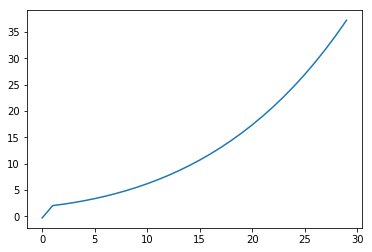

In [26]:
df['Return on Initial Investment'].plot()